[参考](https://jizhi.im/course/dl_keras/2)

# 数据预处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#读取数据
red=pd.read_csv('winequality-red.csv',sep=';')
white=pd.read_csv('winequality-white.csv',sep=';')
#输出数据
print(red.info)
print(white.info)

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

在读取数据集时，红酒和白酒是分别存在于两个DataFrame变量中的，为了方便分类任务，需要将两个变量进行合并。下面对数据作预处理，然后就可以开始搭建自己的神经网络了。

In [3]:
#将红酒数据集添加一列‘type=1’
red['type']=1
#将白酒数据集添加“type=0”
white['type']=0
#将“white”、增补到“red”之后
wines=red.append(white,ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,1
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,1
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,1
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,1
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,1


# 协方差矩阵

现在我们已经有了完整数据集，可以再做一些更深入的数据挖掘。协方差矩阵图像就是一种很好的方法，可以直观地展示变量之间的相关性：

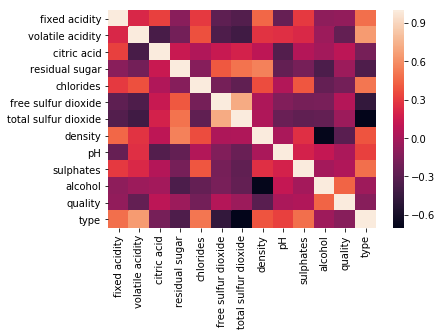

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=wines.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
plt.show()

# 训练集与测试集

大多数分类数据，都不是每个类别的样本恰好一样多，这种不平衡就会导致一些分类上的问题。（比如一个数据集里，两个类别的数量比例是`7:3`，那只要算法全部猜测为多的那一类，也能得到`70%`的正确率。）这样我们就需要让两个类别的酒都在训练集里出现，而且数量要基本一致，这样才不会产生偏差。

酒质量的这个数据及就是不平衡的，但我们先不做额外处理，之后可以再衡量分类性能是否有所下降，借助下采样或上采样等方式。现在，先导入`sklearn.model_selection`里的`train_test_split`方法，来把数据和标签分配到变量`X`和`y`当中。我们还需要调用`ravel()`函数把数据“展平”，以适应之后的函数输入格式。

In [5]:
#从Scikit-learn中导入train_test_split模块
from sklearn.model_selection import train_test_split
import numpy as np
#指定特征变量列
X=wines.iloc[:,0:11]
#指定标签列，展平多维数组
y=np.ravel(wines.type)
#将数据分割为训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)


至此我们已经准备好构建第一个神经网络了，但是还有一件事值得留意，那就是数据的标准化。

# 数据标准化


当有些数据值相隔甚远的时候，就需要进行标准化处理。`Scikit-Learn`提供了很强力且快捷的方式：从`sklearn.preprocessing`模块导入`StandardScaler`工具：

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 搭建神经网络

在真正开始建模之前，回顾我们一开始的问题：能否根据化学性质，如挥发性酸度或硫酸盐，预测酒是红酒还是白酒？因为这里有两个分类：红or白，所以是个二分类`(binary classification)`问题，本质上相当于0/1, yes/no。因为神经网络只能处理数值信息，所以之前已经将红/白编码成了0/1。

多层感知器是一种擅长二分类的神经网络，在本教程开头已经介绍过，多层感知器通常是全连接的，也就是简单地把若干全连接层堆砌起来。在激活函数的选择上，基于熟悉Keras和神经网络的目的，可以使用最最普遍的ReLU函数。

那么如何开始着手构建呢？一个快捷的方法是使用Keras的序贯模型(Sequential model)：层的线性堆叠。我们可以轻松地创建模型，再把层实例传递给模型，具体的命令是:`model=Sequential()`。

现在来想一想多层感知器的结构：输入层，若干隐藏层和输出层。当你构建自己的模型时，必须清楚定义输入形状，模型需要知道输入形状，所以你会发现`input_shape, input_dim, input_length`或`batch_size`等。

全连接层在`Keras`里称为`Dense`层，执行了以下操作`output = activation(dot(inputs, units) + bias)`。注意如果没有激活函数的话，Dense层就只包含两个线性操作：点乘、求和。

在第一层当中，`activation`参数取值`relu`，之后定义了`input_shape=(11, )`，因为有11个特征。第一个隐藏层含有16个神经元，所以Dense()的units参数等于16，也就是说模型的输出形状为(*, 16)。units代表的就是权重矩阵，内有对应每个输入节点的权重值。因为没有将use_bias设为TRUE，所以暂时没有偏置项，这也是可行的。

第二个隐藏层同样使用relu激活函数，这层的输出数组形状为`(*, 8)`。最后的输出Dense层尺寸为1，用sigmoid激活函数，所以最终的输出结果是一个0-1之间的概率，对应的是样本属于标签1，即红酒的概率。

请在下方的代码区域搭建神经网络，要求：

- 使用Sequential()模型
- 共有3层，且第一层的输入参数为(11,)
- 输出层使用sigmoid激活函数

In [8]:
#导入Sequential模型和Dense层
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()

#隐藏层1
model.add(Dense(16,activation='relu',input_shape=(11,)))
#隐藏层2
model.add(Dense(8,activation='relu'))
#输出层
model.add(Dense(1,activation='sigmoid'))

Using TensorFlow backend.


总的来讲，关于神经网络的架构，有两个关键的决策：

1. 多少层？
2. 每层多少个单元？
在这个例子中，我们第一层有16个单元，也就是在学习数据表征时的自由度，更多的隐藏单元可以学习更复杂的表征，但是计算消耗也更大，而且容易过拟合`(overfitting)`。当模型过于复杂的时候，就会出现过拟合：把一些随机的误差或噪音也当作特征，换言之就是训练数据被拟合的“太好了”。所以当我们并没有足够多数据的时候，最好还是用相对小的神经网络，层数也不要太多。

如果想要获取所建模型的信息，可以使用`output_shape`或`summary()`函数，喜爱main列举了几种常用方法：

In [11]:
#输出形状
model.output_shape
#模型总览
model.summary()
#详细参数
model.get_config()
#权重矩阵
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


[array([[ -4.98264432e-02,  -8.99875760e-02,   1.66897923e-01,
           3.89293462e-01,   2.48389035e-01,   1.94905251e-01,
           3.81554663e-02,  -1.70459509e-01,  -4.62478936e-01,
           9.45781171e-02,  -9.45084095e-02,   4.50080931e-02,
          -2.01654226e-01,  -2.18820870e-02,  -3.53524268e-01,
          -3.39704037e-01],
        [  4.67661113e-01,   6.37504160e-02,  -2.29388103e-01,
          -5.40849864e-02,   2.22171873e-01,   2.39076287e-01,
          -3.60502452e-01,  -3.84893119e-01,   1.26932710e-01,
           3.79719436e-02,   3.56621891e-01,   1.69539779e-01,
           4.34244841e-01,   4.50510353e-01,   2.42370367e-02,
          -2.50114679e-01],
        [ -3.73600125e-01,  -2.06571698e-01,  -1.06325597e-01,
           1.82575583e-02,   9.36785340e-03,  -7.66809583e-02,
           3.23935062e-01,   3.03234130e-01,   1.04181617e-01,
          -3.18242192e-01,   2.15769619e-01,  -2.10983753e-02,
           1.22898072e-01,   3.79836261e-02,  -2.06408739e-01,

# 编译和拟合

现在是时候编译我们的模型并针对数据进行拟合了，相应的函数是compile()和fit()：

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5,batch_size=1,verbose=2)

Epoch 1/5
3s - loss: 0.0807 - acc: 0.9809
Epoch 2/5
3s - loss: 0.0291 - acc: 0.9949
Epoch 3/5
3s - loss: 0.0239 - acc: 0.9959
Epoch 4/5
3s - loss: 0.0211 - acc: 0.9961
Epoch 5/5
3s - loss: 0.0187 - acc: 0.9966


在编译`(compile)`过程中，我们为模型指定了adam优化器和`binary_crossentropy`损失函数。将`['accuracy']`传给参数metrics还可以监测训练过程中的准确度。optimizer和loss是编译模型需要的另外两个参数，最流行的几种优化算法有：随即梯度下降`(Stochastic Gradient Descent, SGD)`，`ADAM`和`RMSprop`。根据所选算法不同，调整的参数也会有不同，不如学习率或者动量(momentum)。损失函数的选择取决于面对的任务：比如回归问题一般用均方误差(`Mean Squared Error, MSE)`。而在这个二分类的例子中，我们用`binary_crossentropy`；对于多分类任务，可以使用`categorical_crossentropy`。

之后我们对所有`X_train`和`y_trai`n的样本迭代训练了5个来回，批次规模为1个样本。`verbose`则是为了设置输出内容。我们用特定的迭代回数训练模型，一次迭代(epoch)就是把所有训练集筛过一遍，然后对照测试集。批规模`(batch size)`则定义了每次在网络里传播的样本数量，这样做也是为了在内存有限的情况下优化效率。

## 预测值

下面把训练的模型投入实战，你可以对测试集数据，预测每个样本的标签，只需调用predict()，把结果赋值给变量y_pred:

In [28]:
y_pred = model.predict(X_test)

## 评价模型

现在我们已经建立了模型，并且用于对此前未见的数据做预测，之后肯定还要衡量平价一下整个模型的表现。可以直接拿y_pred和y_test去比较看看中了几个，或者使用其他更高级的度量衡。对这个实例，我们调用evaluate()函数，传递测试数据+测试标签即可得到全局得分：


In [31]:
score=model.evaluate(X_test,y_test,verbose=2)
print(score)

[0.022412170111003608, 0.9944055944055944]
